## Dominant Color Extraction for Image Segmentation
- **Image Segmentation**
- Segmentation partitions an image into regions having similar visual appearance corresponding to parts of objects
- We will try to extract the most dominant 'K' Colors using K-Means
- We can apply K-Means with each pixel will reassigned to the closest of the K Colors, leading to segmentation

<img src="example.png" alt="Pizza-1" style="width: 800px;"/>



Fig : Bishop, Pattern Recognition and ML

In [1]:
import matplotlib.pyplot as plt

In [ ]:
import 

In [4]:
import cv2

In [93]:
im =  cv2.imread('elephant.jpg') #Reads an image into BGR Format

im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
original_shape = im.shape
print(im.shape)


(330, 500, 3)


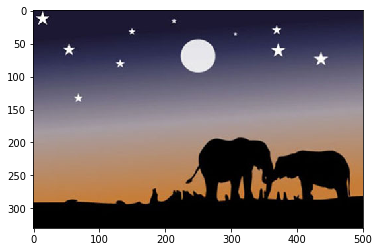

In [94]:
plt.imshow(im) # as RGB Format
plt.show()

In [95]:
# Flatten Each channel of the Image
all_pixels  = im.reshape((-1,3))
print(all_pixels.shape)

(165000, 3)


In [96]:
from sklearn.cluster import KMeansans

ImportError: cannot import name 'KMeansans'

In [97]:
dominant_colors = 4

km = KMeans(n_clusters=dominant_colors)
km.fit(all_pixels)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [98]:
centers = km.cluster_centers_

In [99]:
centers = np.array(centers,dtype='uint8')

In [100]:
print(centers)

[[  1   0   1]
 [174 145 128]
 [ 98  94 117]
 [ 38  35  64]]


### Plot what all colors are these ?

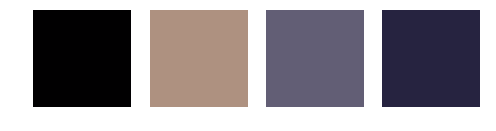

In [101]:
i = 1

plt.figure(0,figsize=(8,2))


colors = []

for each_col in centers:
    plt.subplot(1,4,i)
    plt.axis("off")
    i+=1
    
    colors.append(each_col)
    
    #Color Swatch
    a = np.zeros((100,100,3),dtype='uint8')
    a[:,:,:] = each_col
    plt.imshow(a)
    
plt.show()


## Segmenting Our Original Image

In [102]:
new_img = np.zeros((330*500,3),dtype='uint8')

print(new_img.shape)


(165000, 3)


In [103]:
colors

[array([1, 0, 1], dtype=uint8),
 array([174, 145, 128], dtype=uint8),
 array([ 98,  94, 117], dtype=uint8),
 array([38, 35, 64], dtype=uint8)]

In [104]:
km.labels_

array([3, 3, 3, ..., 0, 0, 0])

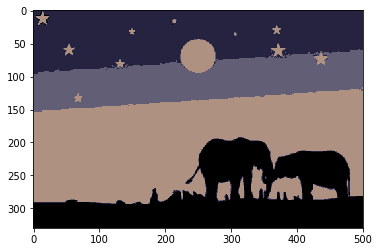

In [105]:

for ix in range(new_img.shape[0]):
    new_img[ix] = colors[km.labels_[ix]]
    
new_img = new_img.reshape((original_shape))
plt.imshow(new_img)
plt.show()
    
    
